<a href="https://colab.research.google.com/github/ItoroKoffi/GraphRep/blob/main/Colab_0_Networkx_and_PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup**

## 0.0 Import Dependencies

In [ ]:
#import NetworkX package
import networkx as nx
import matplotlib.pyplot as plt

## 1.0 **Graph**
NetworkX provides classes to store and create different types of graphs.
* Graph - undirected
* DiGraph - directed
* MultiGraph - undirected
* MultiDiGraph - directed

In [ ]:
#create an undirected graph
G = nx.Graph()
print(G.is_directed())

#Create a directed Graph
H = nx.DiGraph()
print(H.is_directed())

#Add Graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)


False
True
{'Name': 'Bar'}


 ## **2.0 Node**

NetworkX graphs allows the addition of nodes(with attributes) using `add_node()`
* (n, attr) - node, attributes

In [ ]:
# Add one node with node level attributes
G.add_node(0, features = 5, label =1)

#Get attributes of node 0
node_0_attr = G.nodes[0]
print(f"Node 0 has the following attributes: {node_0_attr}")

Node 0 has the following attributes: {'features': 5, 'label': 1}


### 2.1 Graph Node View

`data=True` returns entire node attribute dict as (n, ddict)

`data=False`, returns just the nodes n.

`.number_of_nodes()` returns the number of nodes in a graph

In [ ]:
#Node view of

G.nodes(data = True)


NodeDataView({0: {'features': 5, 'label': 1}})

### 2.2 Add multiple nodes with attributes

`.add_nodes_from()` - a container of node, attribute in a dictionary

In [ ]:
G.add_nodes_from([
    (1, {"feature": 1, "label": 1}),
    (2, {"feature": 2, "label": 2})
])

#Loop through all nodes
for node in G.nodes(data=True):
  print(node)

#Get number of nodes
num_nodes = G.number_of_nodes()
print(f"G has {num_nodes} nodes")

(0, {'features': 5, 'label': 1})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## **3.0 Edge**

Just like in nodes, NetworkX allows for edges (with attributes) addition using:


---


`add.edge()` - adds one edge --> *(u, v, k, attr)*
* u, v - the nodes to connect,
* key - for multigraph only to distinguish mutiple edges between same nodes
* attr - optional edge attributes (e.g weight, color,
capacity, etc.)





In [ ]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get atributes of the edge(0,1)
edge_0_1_attr = G.edges[(0,1)]
print(f"Edge(0,1) has the attribute: {edge_0_1_attr}")

Edge(0,1) has the attribute: {'weight': 0.5}


### 3.1 Adding multiple edges

`add_edge_from()` --> add multiple edges at once
* (u, v) or
* (u, v , dict) -> edges with attributes


In [ ]:
#Add multiple edges with edge weights
G.add_edges_from([
    (1,2, {"weight": 0.3}),
    (2,0, {"weight": 0.1})
])

#Loop through edges
for edge in G.edges():
  print(edge)

#Get number of edges
num_edges = G.number_of_edges()
print(f'G has {num_edges} edges')

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## **4.0 Visualization**

Graph visualization is possible with NetworkX

### 4.1 Quick Graph visualization
nx.draw (Graph, pos = None, with_labels = False, **kwargs)

* pos= dictionary with node positions e.g {node: (x, y)}
* with_labels = True will show node labels
* kwargs are optional style arguments (color, size, etc)

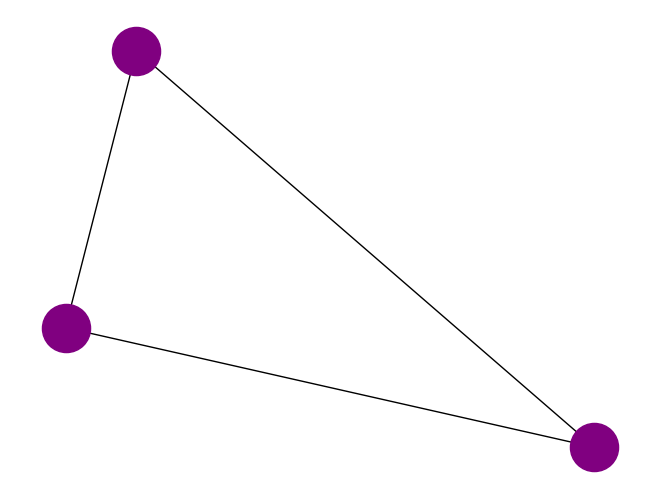

In [ ]:
# Draw the graph
nx.draw(G,
        pos = None,
        with_labels = False,
        node_size=1200,
        node_color = "purple")

### 4.2 Node degree
 Number of edges connected to a node (touching the node)

* undirected graph - degree = number of neighbors
* directed graph:
  * in-degree -> incoming edges
  * out_degree -> outgoing edges

In [ ]:
node_id = 1

#degree_of_node 1
print(f'Node{node_id} has degree {G.degree[node_id]}')

Node1 has degree 2


In [ ]:
for id in range(num_nodes):
  print(f'Node {id} has degree {G.degree[id]}')

Node 0 has degree 2
Node 1 has degree 2
Node 2 has degree 2


### 4.3 Node Neighbor

Actual number of nodes a node is connected to.

Same as node degree in undirected graph

In [ ]:
for neighbor in G.neighbors(node_id):
  print(f"Node {node_id} has neighbor {neighbor}")

Node 1 has neighbor 0
Node 1 has neighbor 2


In [ ]:
for id in range(num_nodes):
  for neighbor in G.neighbors(id):
    print(f"Node {id} has neighbor {neighbor}")

Node 0 has neighbor 1
Node 0 has neighbor 2
Node 1 has neighbor 0
Node 1 has neighbor 2
Node 2 has neighbor 1
Node 2 has neighbor 0


### 4.4 Path Graph

.path_graph() gives a basic sequence of nodes connected in a striaght line.

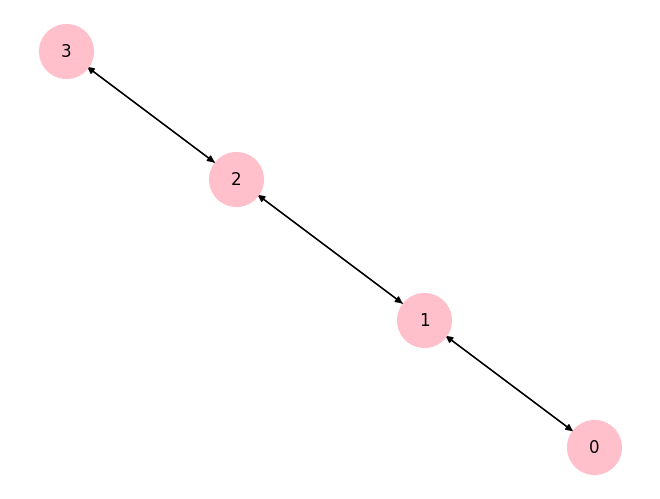

In [ ]:
# create graph using path_graph
num_nodes = 4
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True, node_color = "pink", node_size = 1500)


### 4.5 PageRank

A calculation of influence score for nodes in a graph

* does not directly work for multigraphs
* alpha - dampign factor - 0.85 by default -> probabilty of following a link



In [ ]:
pr = nx.pagerank(G, alpha = 0.8)
pr

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

## **5.0 Pytorch Geometric**

PyG is an extension library in PyTorch for developing Graph Deep Learnign models.

It includes various GNN layers and benchmark datasets

In [ ]:
import torch
print(f"Pytorch has version {torch.__version__}")

Pytorch has version 2.8.0+cpu


### 5.1 Install Dependencies

In [ ]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch.2.8.0+cu126.html


  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch.2.8.0+cu126.html


  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.8/241.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 30.5 MB/s eta 0:00:00


In [ ]:
### 5.2 Visualization

In [ ]:
# Helper function for visualization
%matplotlib inline

#visualization for h = nx graph or pytorch tensor
def visualize(h, color, epoch = None, loss = None, accuracy = None):
  plt.figure(figsize = (7,7))
  plt.xticks([]) #hides x-axis ticks
  plt.yticks([]) #hides y-axis ticks

  if torch.is_tensor(h):
    h = h.detach().cpu().numpy() #moves tensor to cpu, converts to numpy array so matplotlib can use
    plt.scatter(h[:, 0], h[:, 1], s= 140, c = color, cmap= "Set2")
    if epoch is not None and loss is not None and accuracy["train"] is not None and accuracy["val"] is not None:
      plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
      f'Training Accuracy: {accuracy["train"]*100: .2f}% \n'
      f'Validation Accuracy: {accuracy["val"]*100: .2f}%'),
      fontsize=16
    )
  else:
    nx.draw_networkx(h,pos = nx.spring_layout(h, seed = 42), with_labels = False,
                    node_color =color, cmap = "Set2")
  plt.show()

### 5.3 Dataset

Using KarateClub Dataset from Zachary's Karate Club Network

Graph describes a social network of 34 members in a karate club and

documents links between members who interacted outside the club.

In [ ]:
import torch_geometric
from torch_geometric.datasets import KarateClub

dataset =KarateClub()
print(f"Dataset: {dataset}:")
print("=============")
print(f"Number of graphs: {len(dataset)} ")
print(f"Number of features: {dataset.num_features} ")
print(f"Number of classes: {dataset.num_classes} ")

Dataset: KarateClub():
Number of graphs: 1 
Number of features: 34 
Number of classes: 4 


In [ ]:
data = dataset[0] #Get first graph

print(data)
print("========================================")

#Gather some stats about Graph
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {data.num_edges} / {data.num_nodes}: .2f")
print(f"Number of training nodes: {data.train_mask.sum()}")
print(f"Training node label rate: {int(data.train_mask.sum()) / data.num_nodes: .2f}")
print(f"Contains isolated nodes: {data.has_isolated_nodes()}")
print(f"Contain self loops: {data.has_self_loops()}")
print(f"Is undirected: {data.is_undirected()}")

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 156 / 34: .2f
Number of training nodes: 4
Training node label rate:  0.12
Contains isolated nodes: False
Contain self loops: False
Is undirected: True


### 5.4 Data

* Each graph in PyG is represented by a single `data` object,

* Data holds all the information to describe a graph representation

* `print(data)` returns a summary of it's attribute and their shape
* Data has 4 attributes:
  * `edge_index:` information about graph conductivity
  * `node features:` as x (each node is assigned to a frature vector)
  * `node labels:` as y (each node assigned to a class)
  * `train_mask:`

In [ ]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


### 5.5 Edge Index

returns a tuple of node indices [a, b]

* a -> source node
* b -> destination node of an edge

In [ ]:
from IPython.display import Javascript #restrict height of output cell
display(Javascript('''google.colab.output.selfIframeHeight(0, true, {maxHeight: 300})'''))

edge_index =data.edge_index
print(edge_index.t())


<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

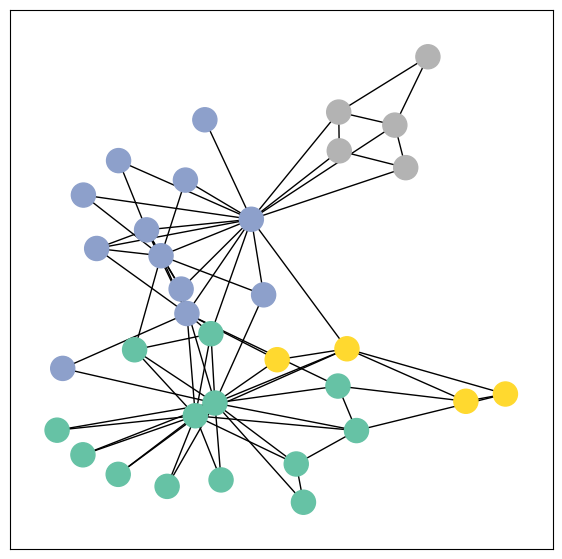

In [ ]:
# convert to data networkx library format and plot
import torch
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected = True)
visualize(G, color = data.y)

### 5.6 Implementing GNN

GNN takes in an input graph,  G = (V, E).

Objective:
* Learn a function that takes in a node and feature vector as well as graph structure then outputs an embedding.




In [ ]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(1234)
    self.conv1 = GCNConv(dataset.num_features, 4)
    self.conv2 = GCNConv (4, 4)
    self.conv3 = GCNConv (4, 2)
    self.classifier = Linear (2, dataset.num_classes)

  def forward(self, x, edge_index):
    h=self.conv1(x, edge_index)
    h=h.tanh()
    h= self.conv2(h, edge_index)
    h=h.tanh()
    h= self.conv3(h, edge_index)
    h=h.tanh()

    # apply final linear claassifier
    out = self.classifier(h)

    return out, h

model=GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


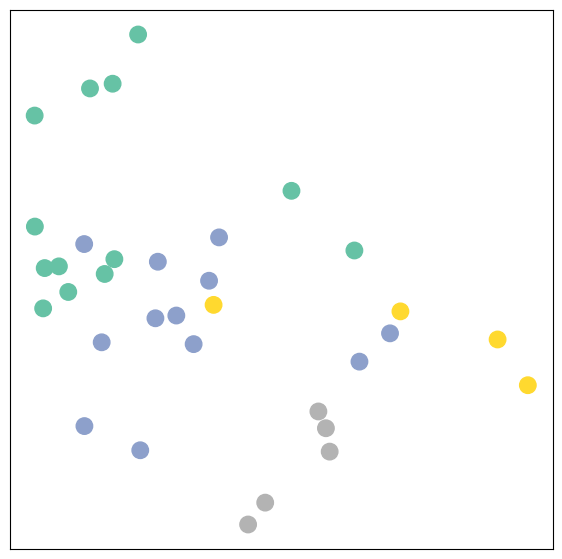

In [ ]:
model = GCN()
_, h = model(data.x, data.edge_index)
print(f"Embedding shape: {list(h.shape)}")

visualize(h, color=data.y)

## 5.7 Training on Karate Club Network

Using a semi-supervised learning process
only use training nodes for computing loss



<IPython.core.display.Javascript object>

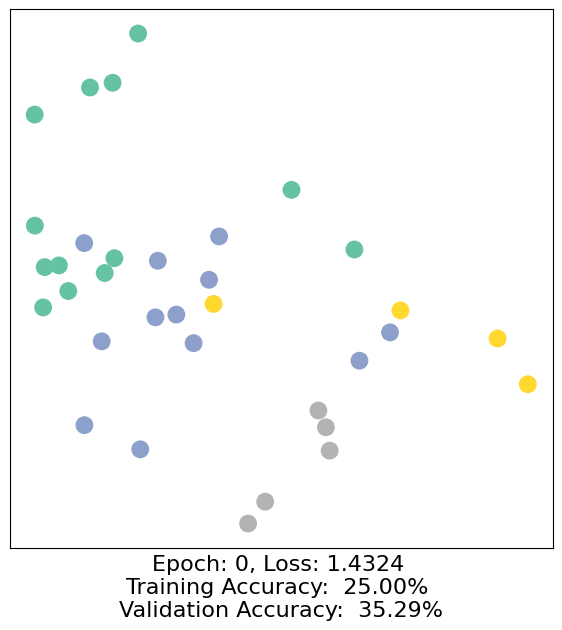

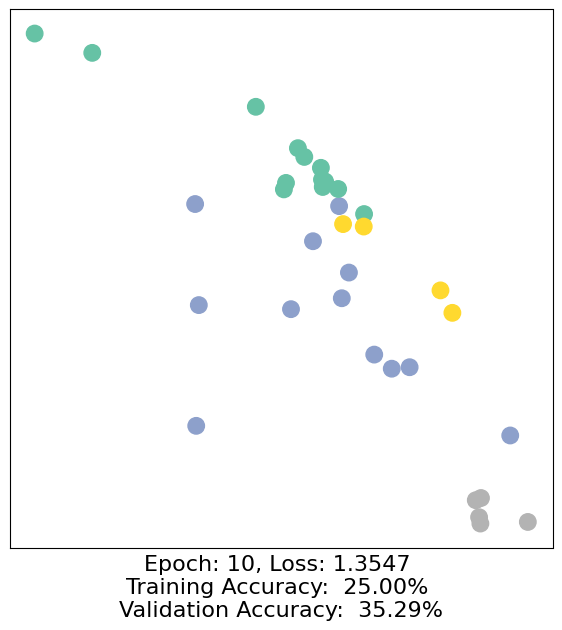

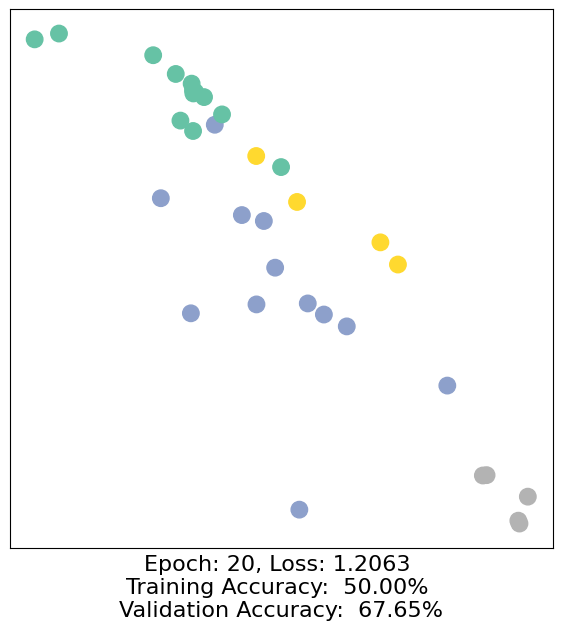

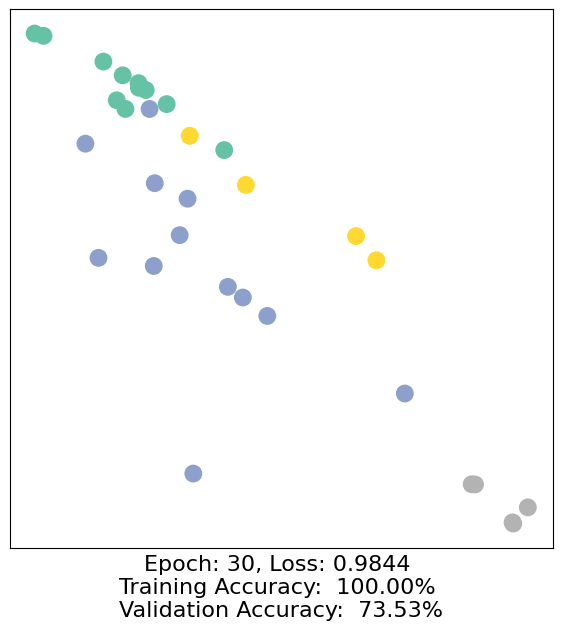

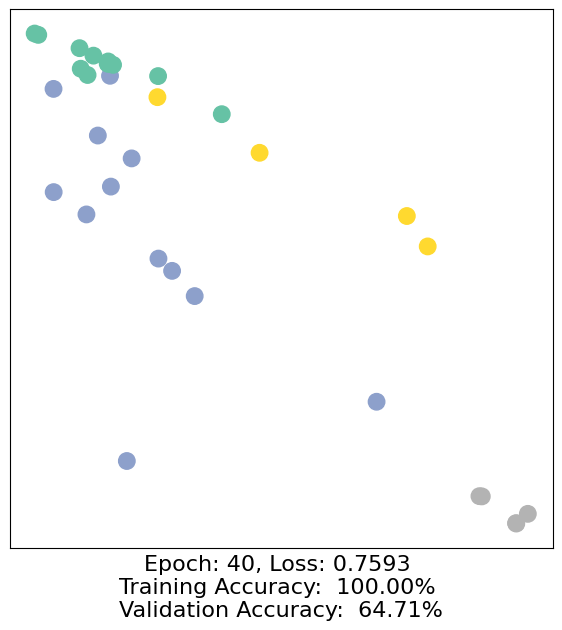

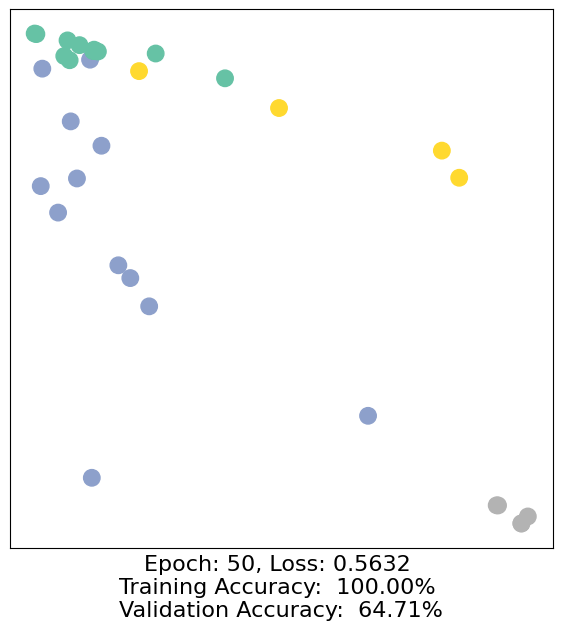

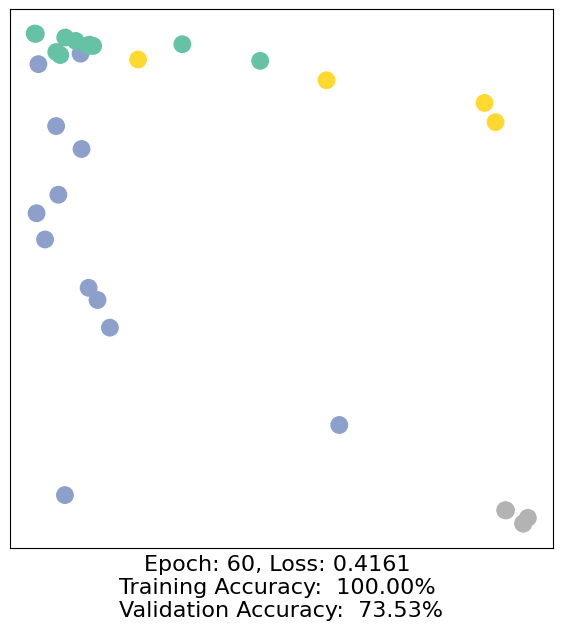

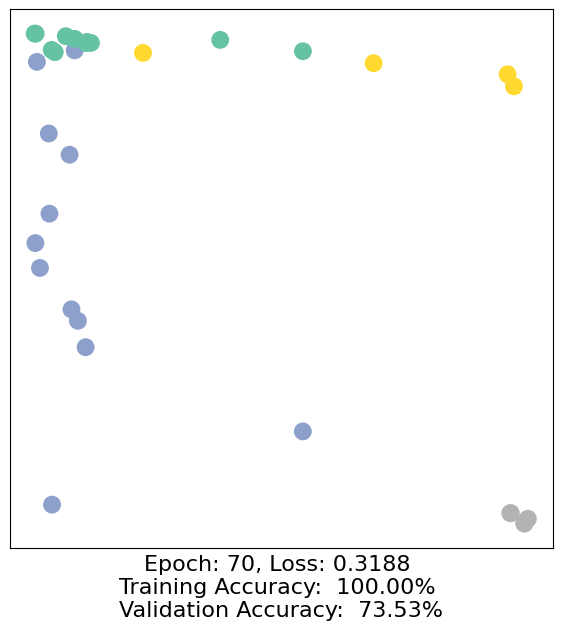

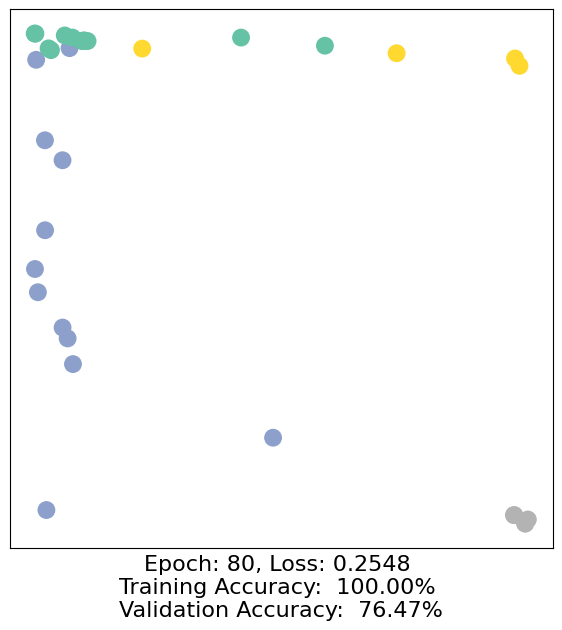

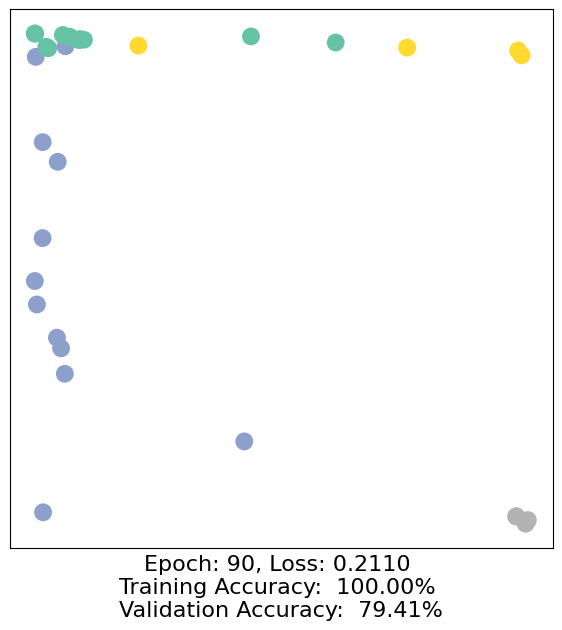

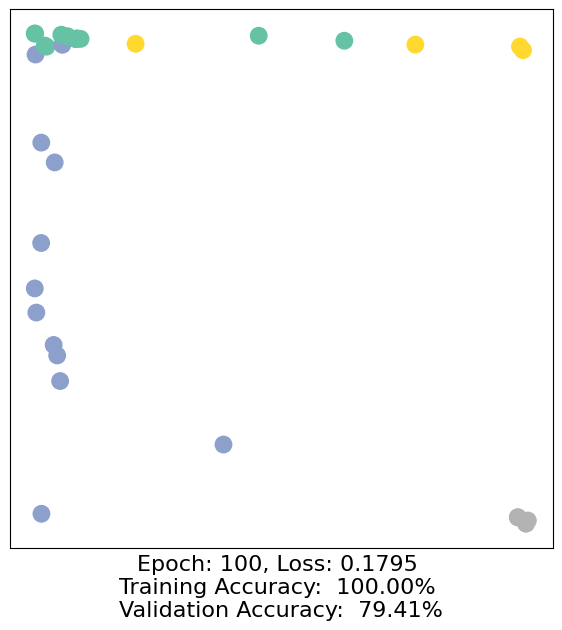

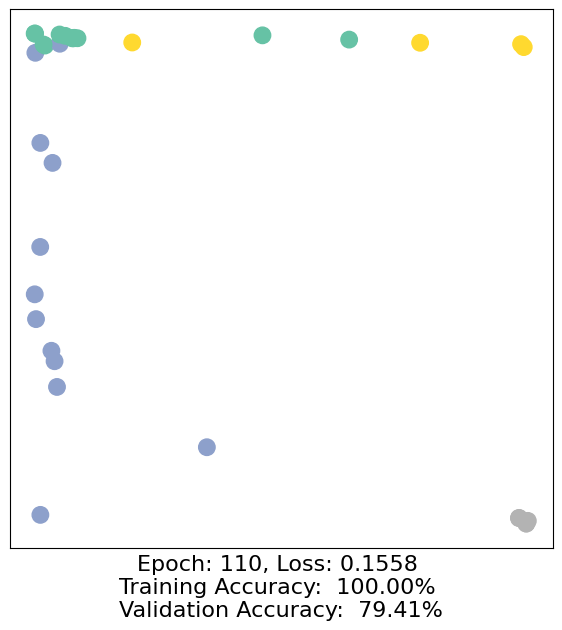

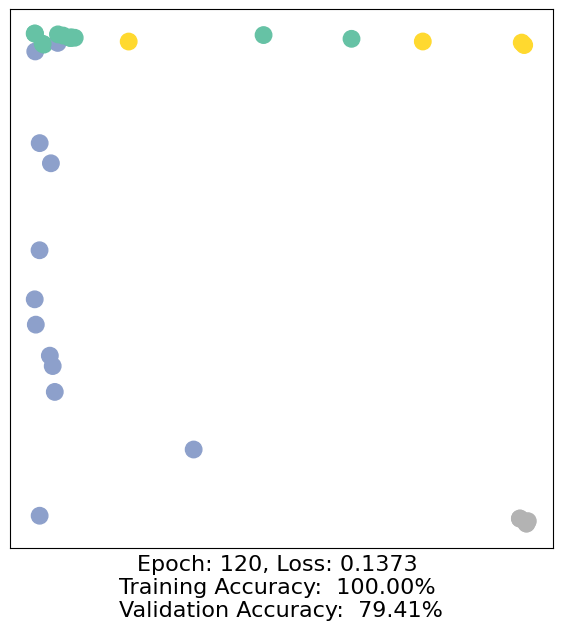

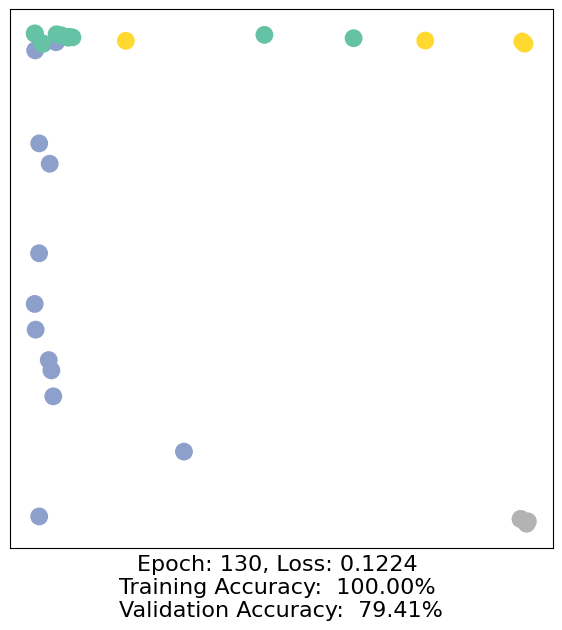

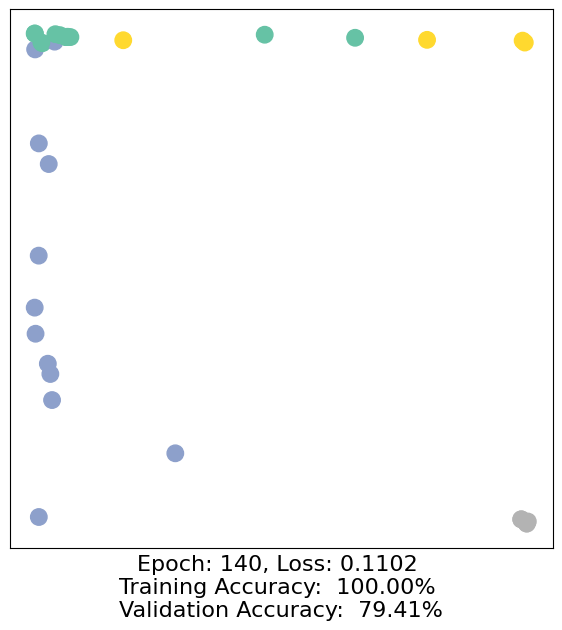

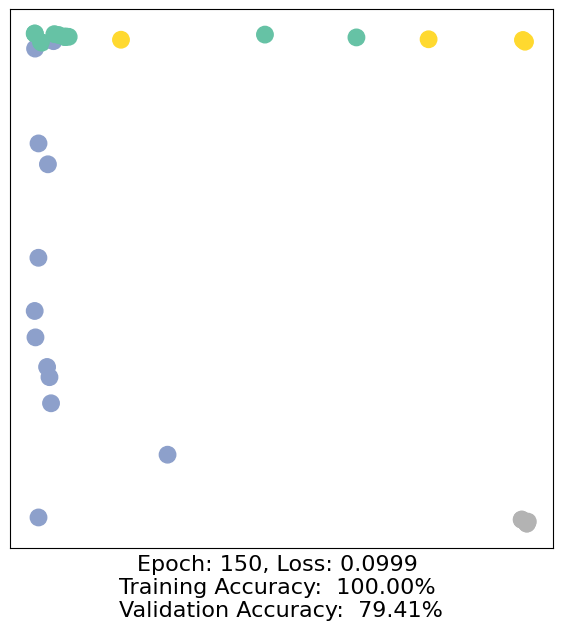

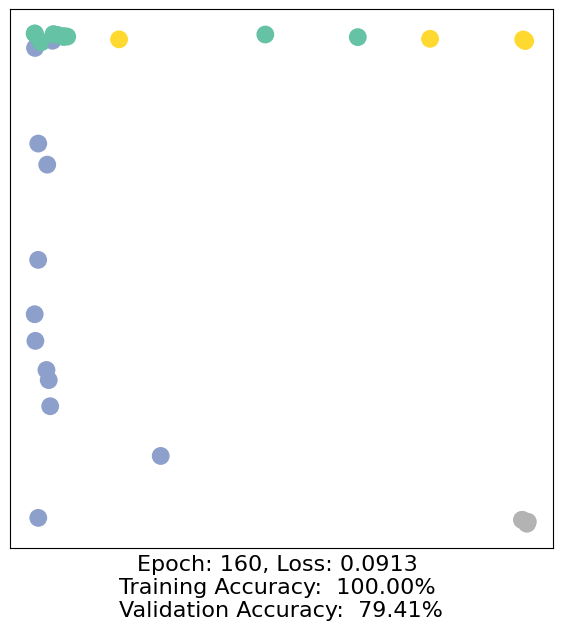

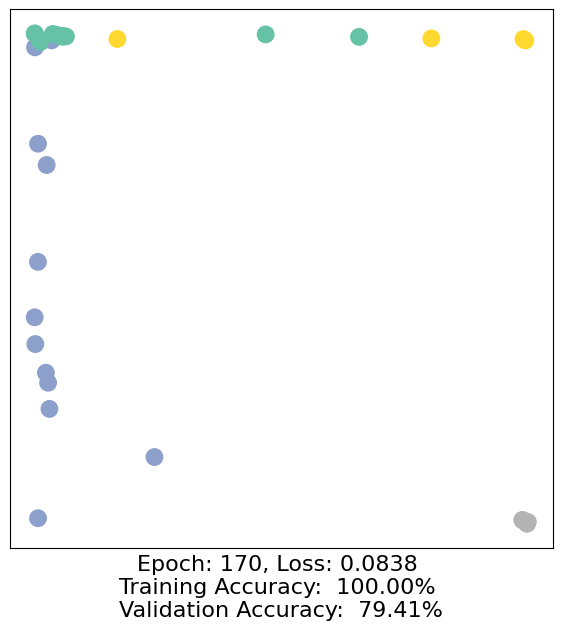

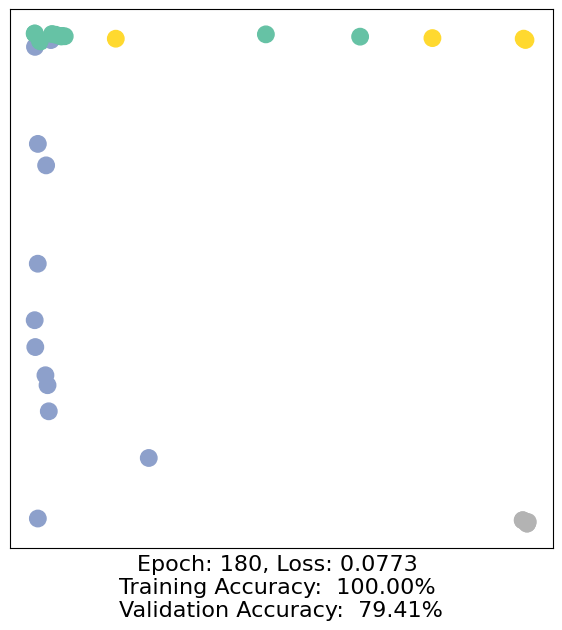

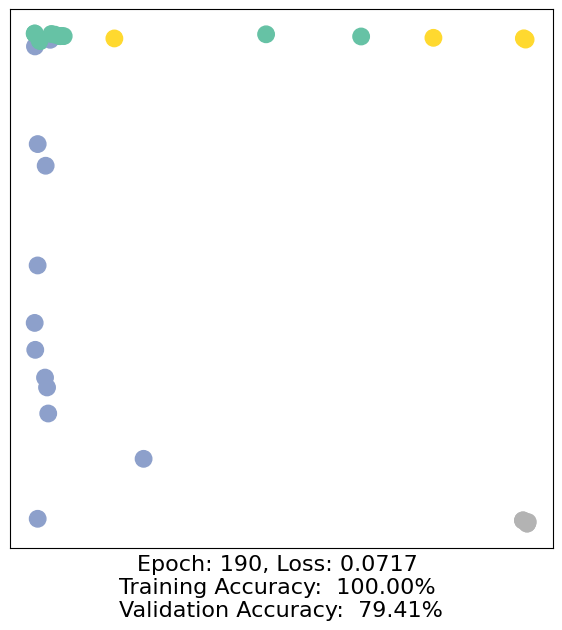

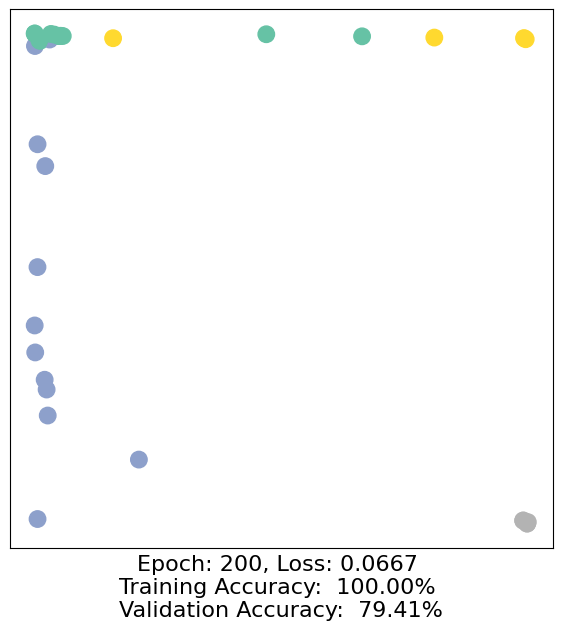

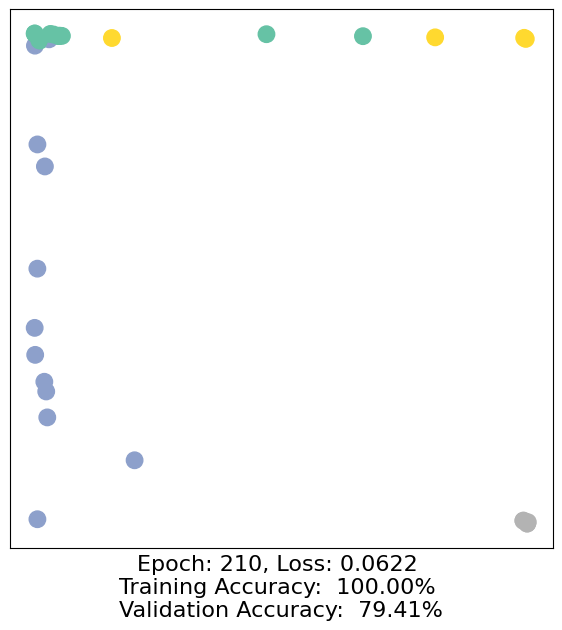

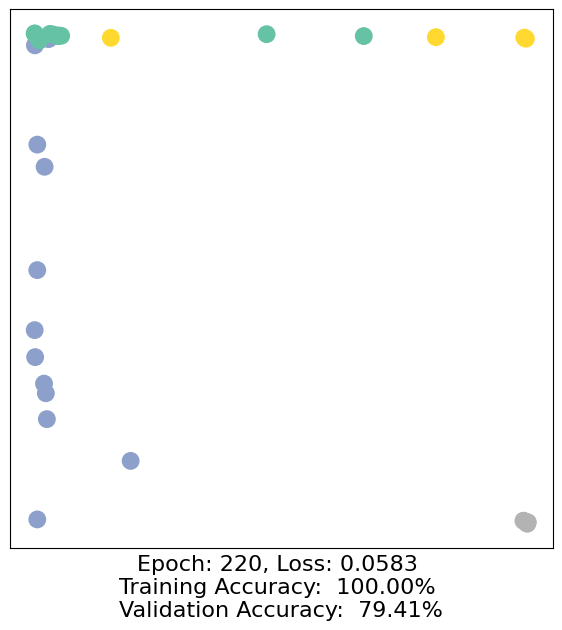

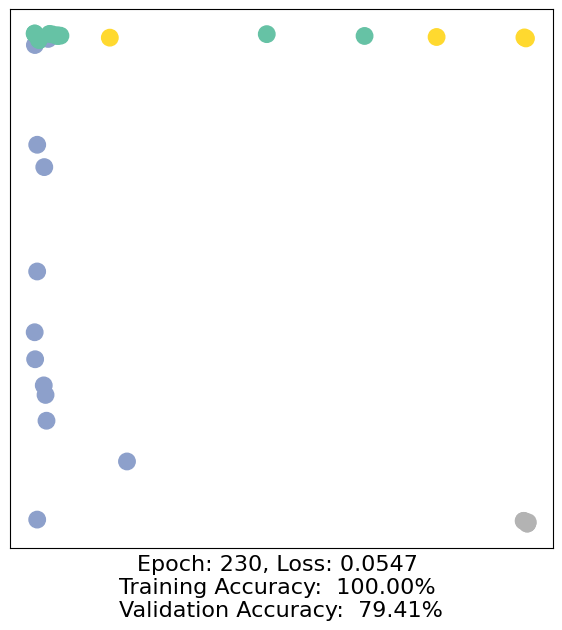

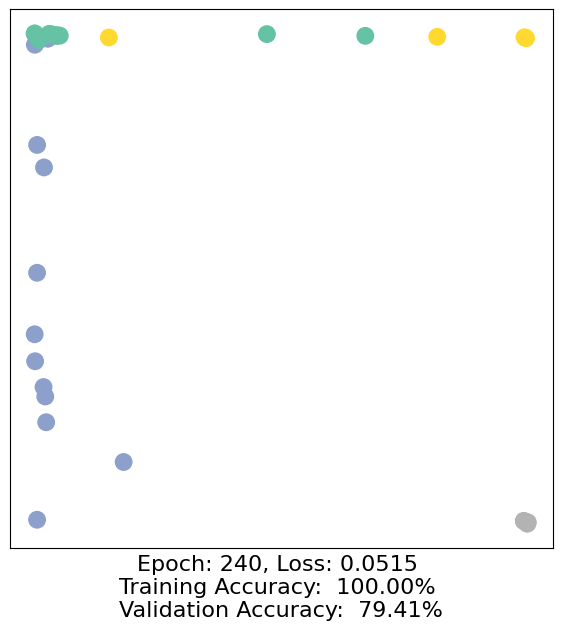

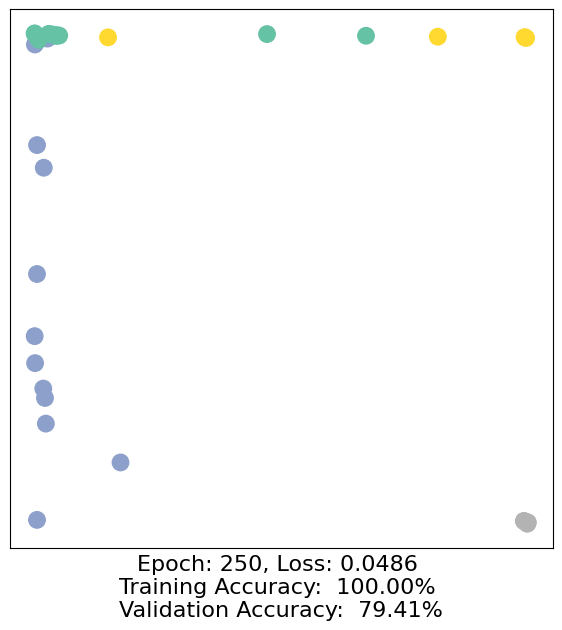

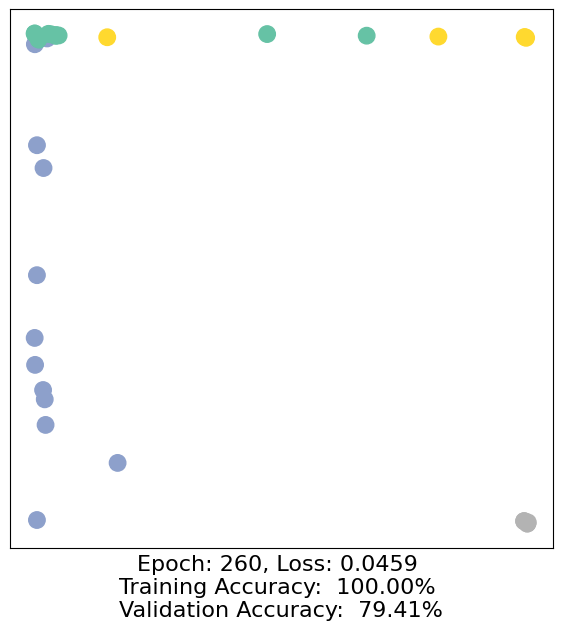

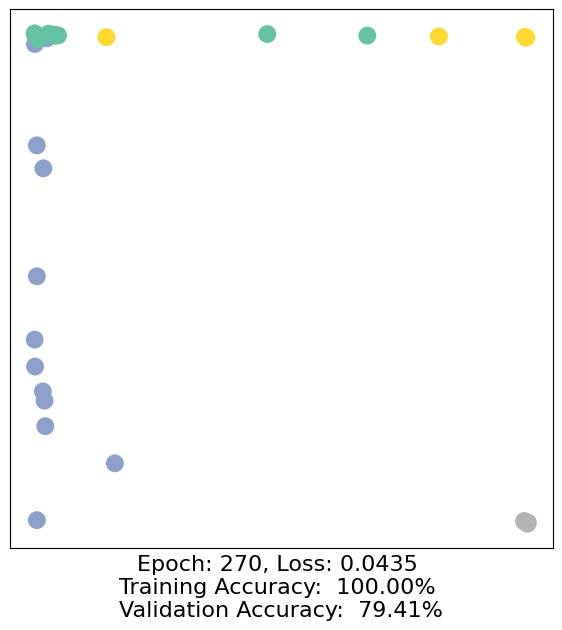

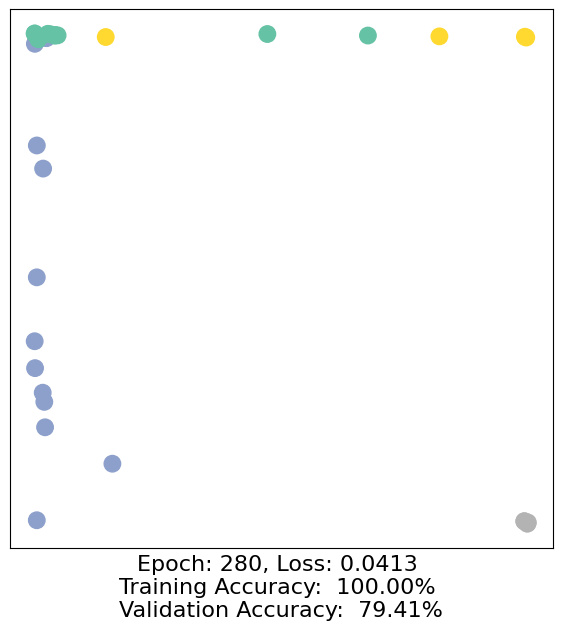

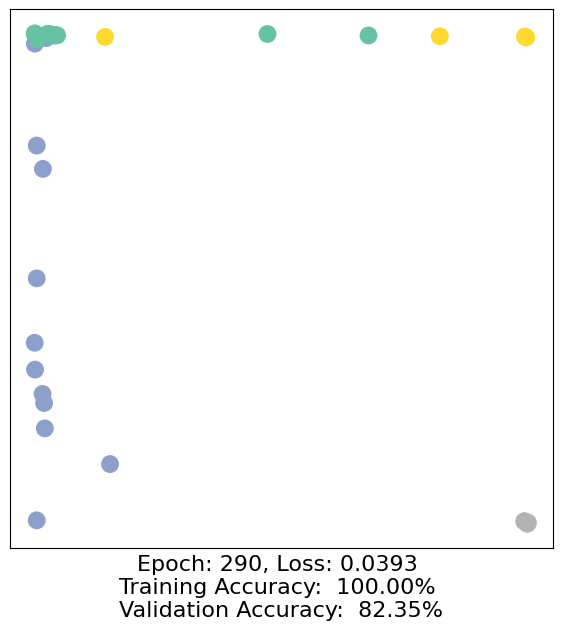

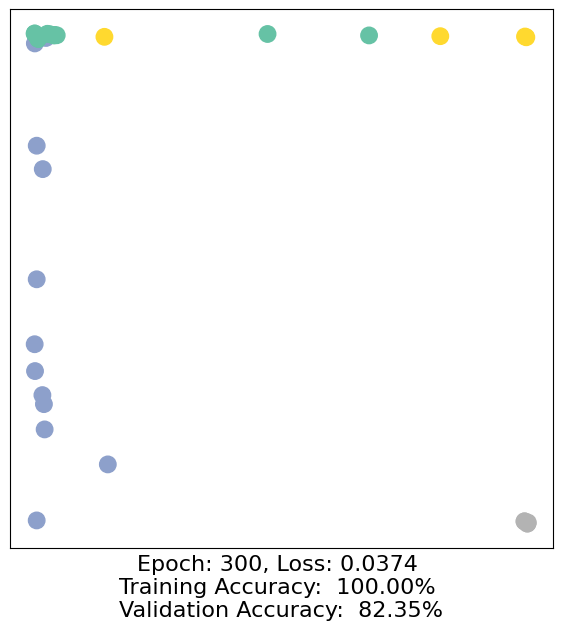

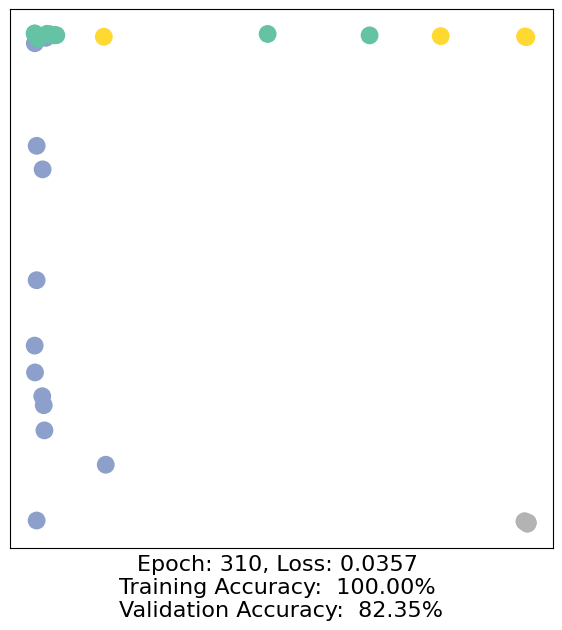

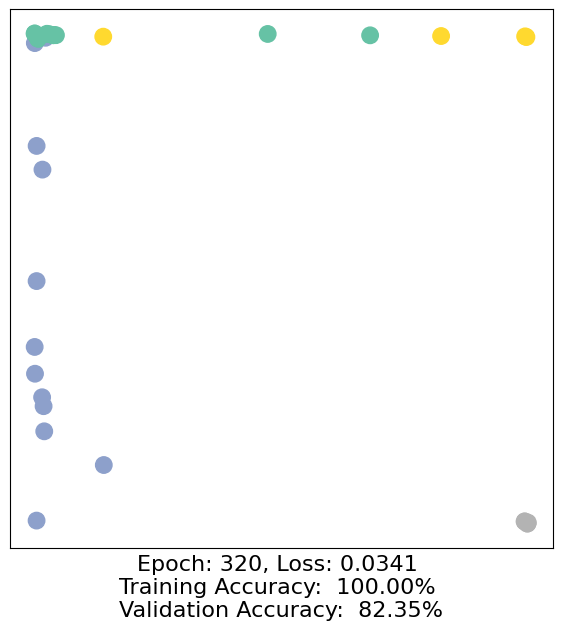

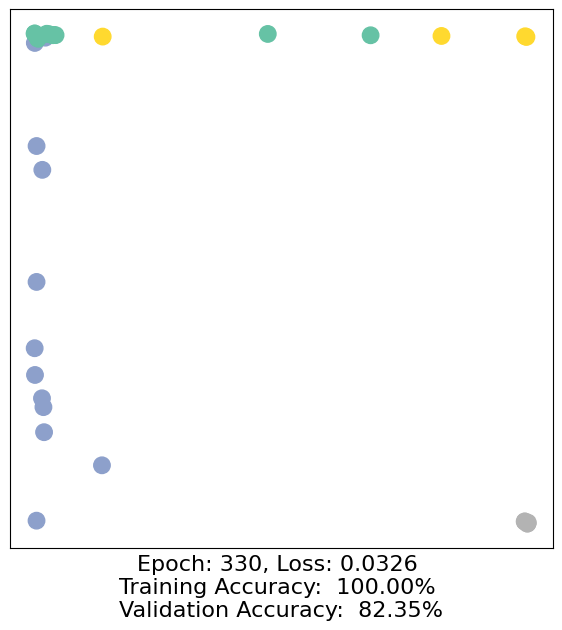

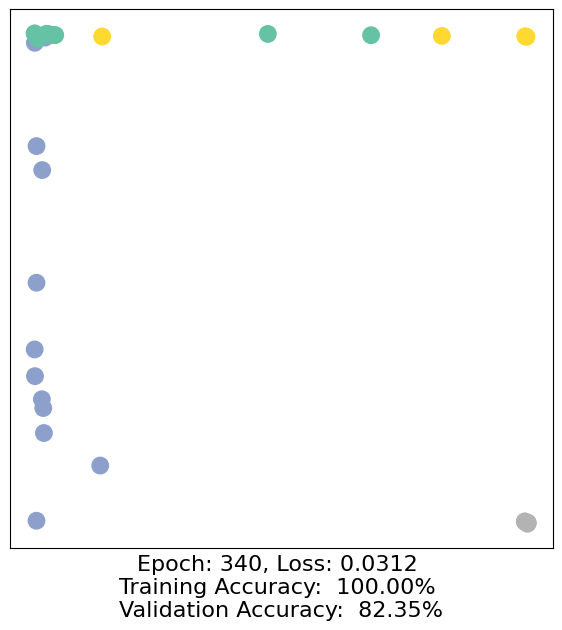

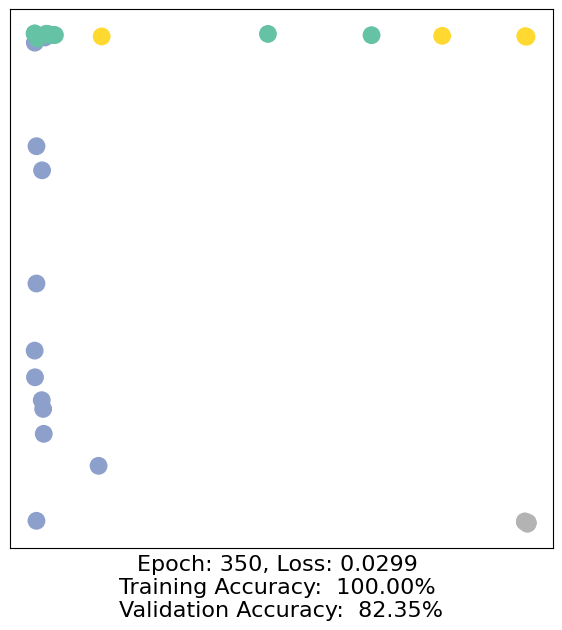

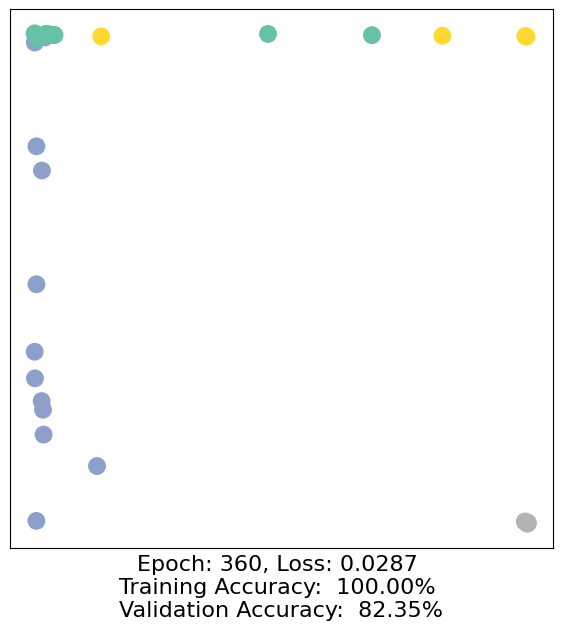

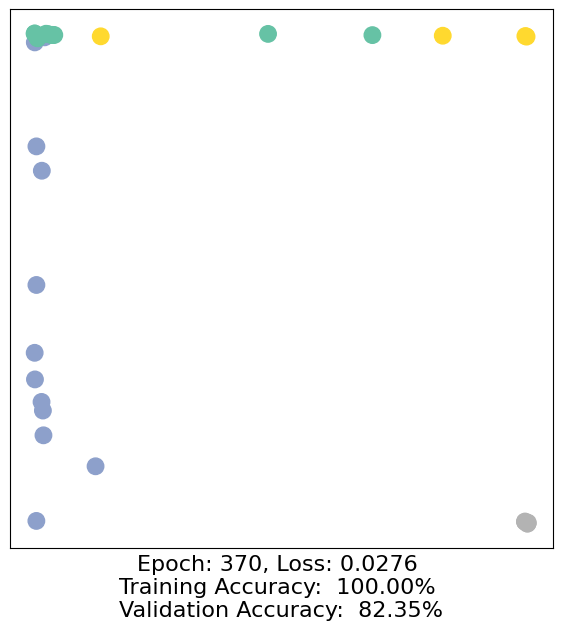

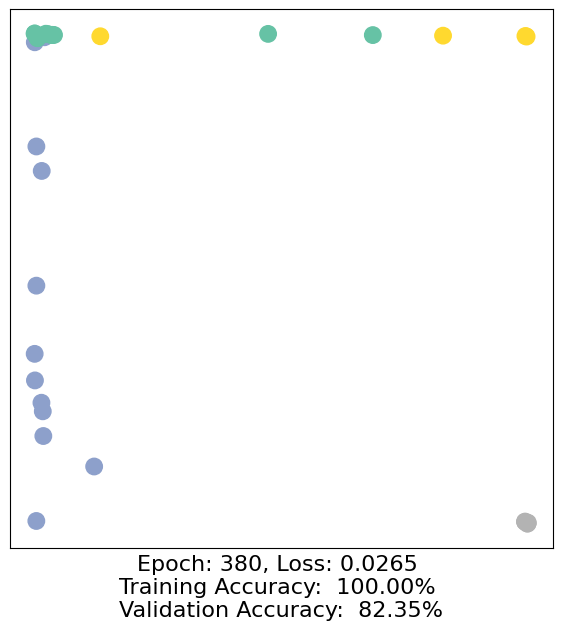

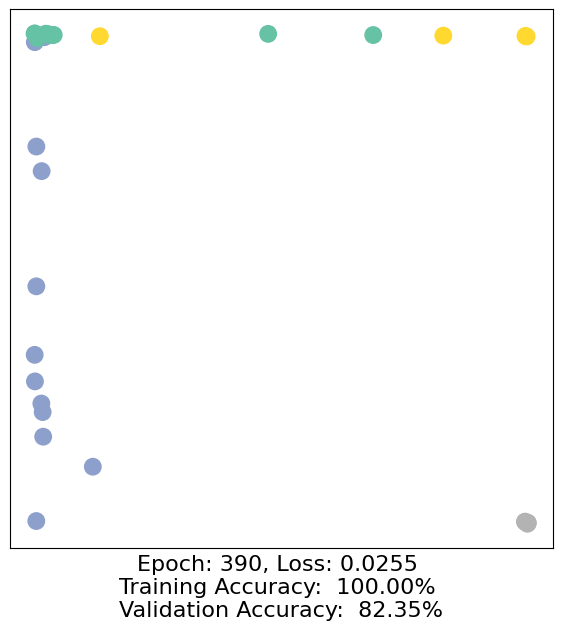

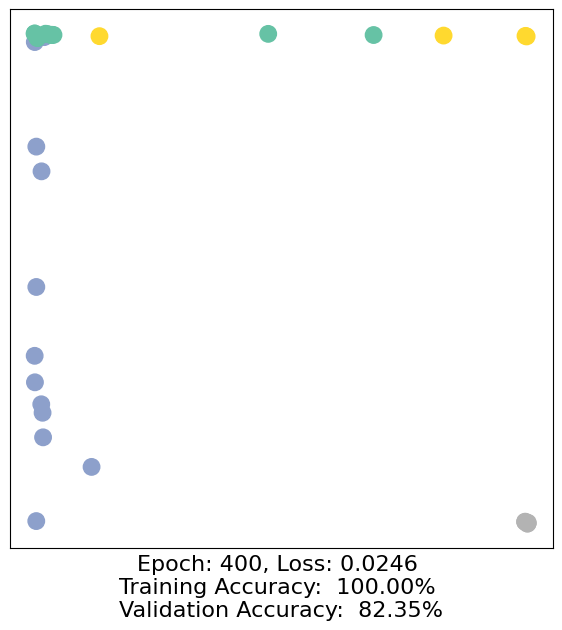

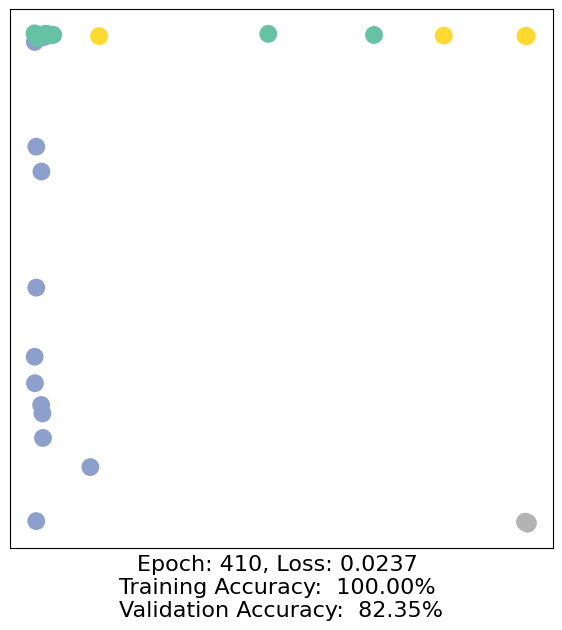

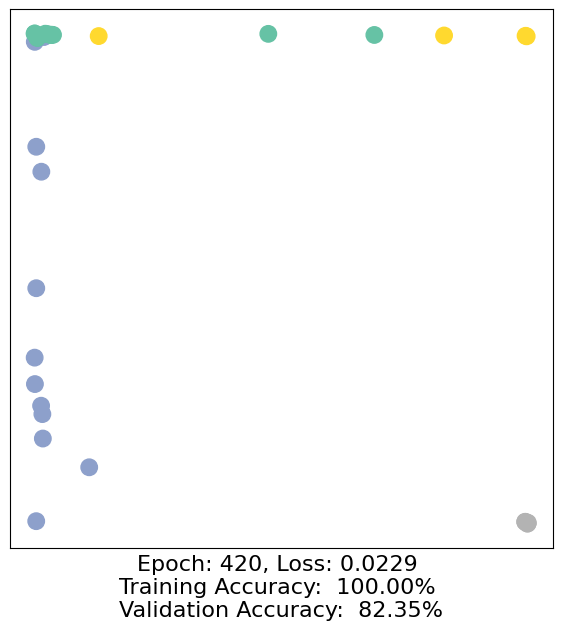

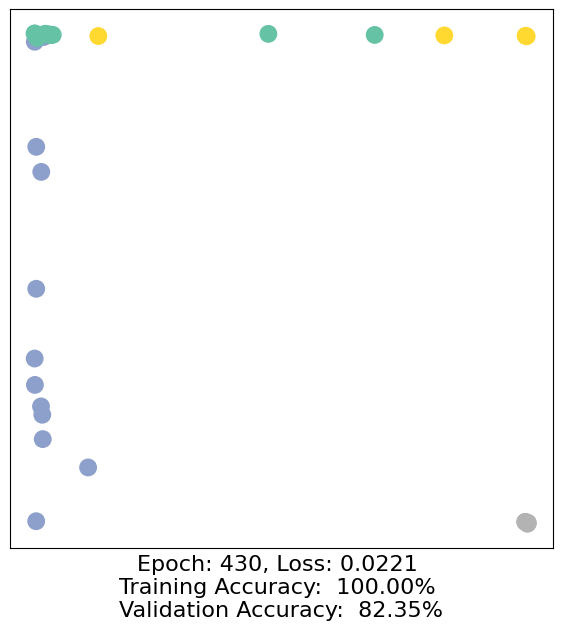

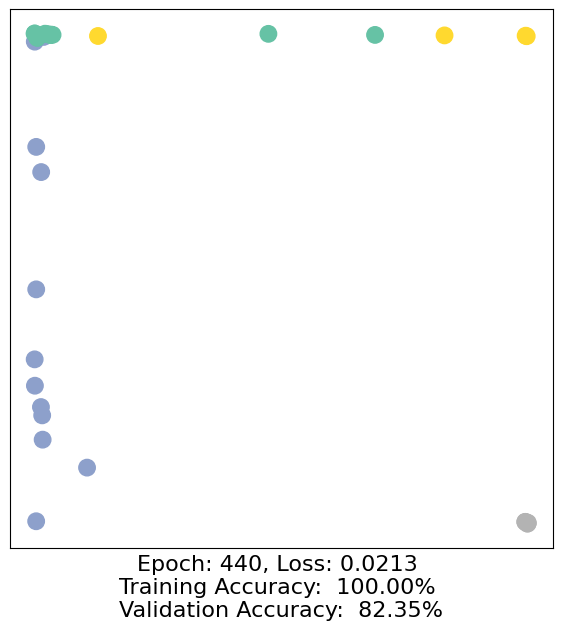

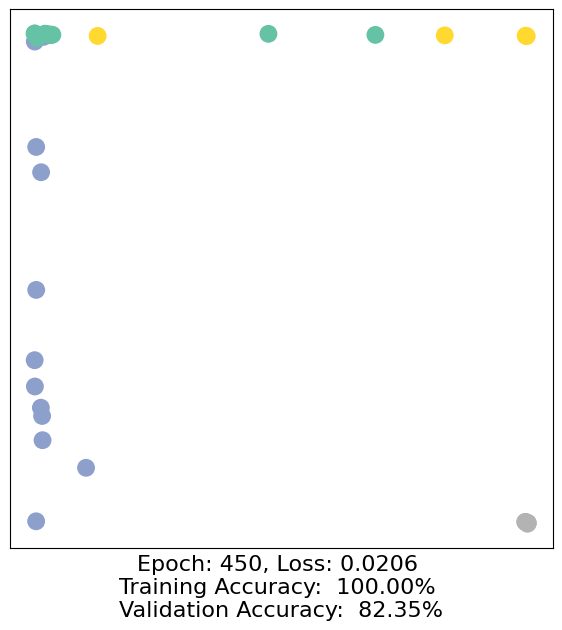

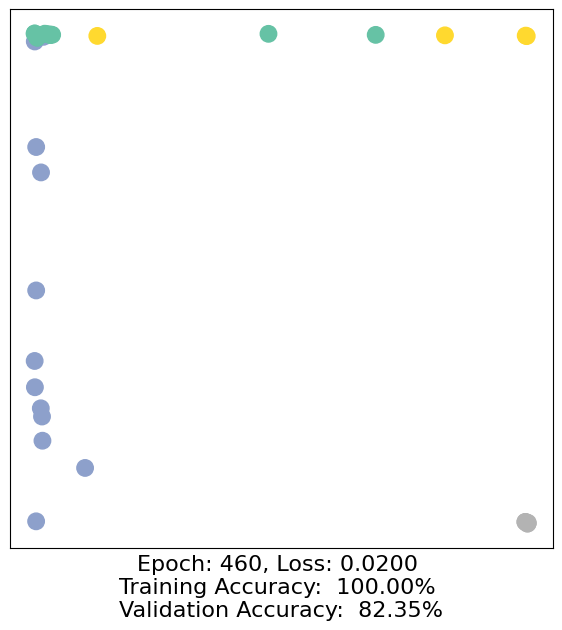

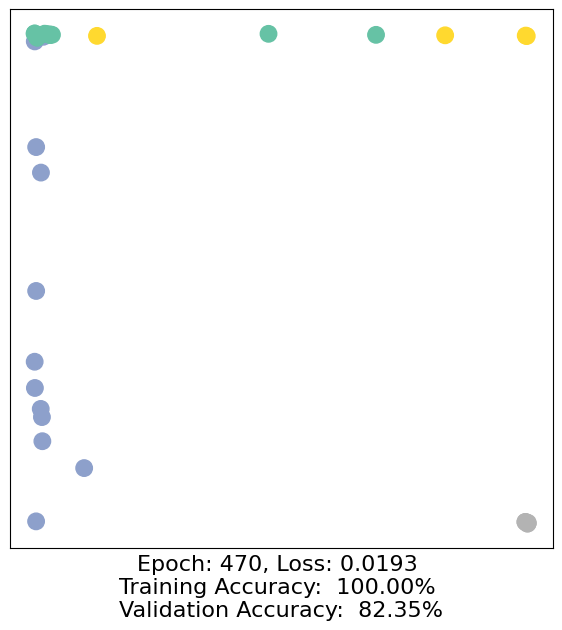

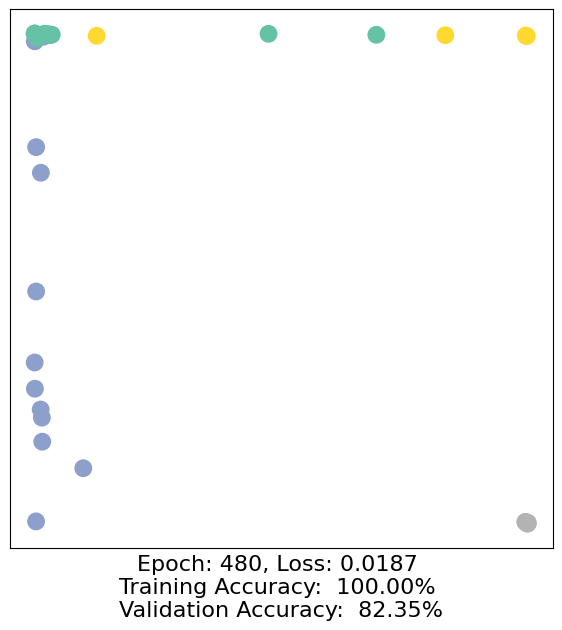

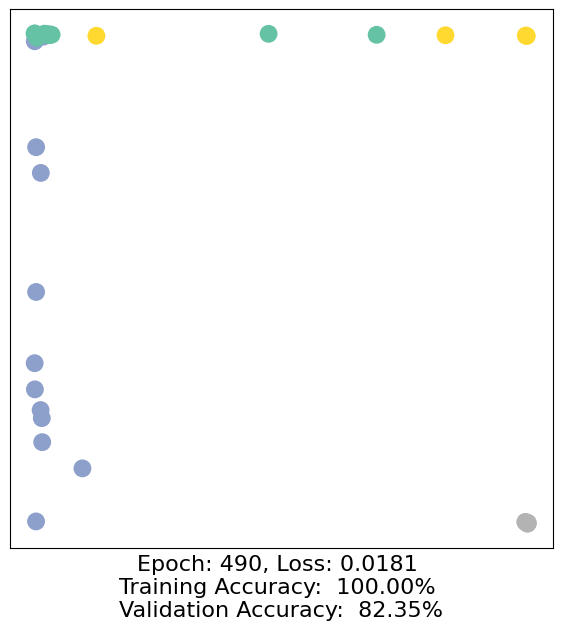

In [ ]:
import time
from IPython.display import Javascript #restrict height of output cell
display(Javascript('''google.colb.output.selfframeHeight(0, true, {maxHeight:430})'''))

model = GCN()
criterion  = torch.nn.CrossEntropyLoss() # define loss criterion
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #define optimizer

def train(data):
  optimizer.zero_grad() # clear grd
  out, h = model (data.x, data.edge_index) #forward pass
  loss = criterion(out[data.train_mask], data.y[data.train_mask]) # compute loss based on training nodes
  loss.backward() #derive gradients
  optimizer.step() #update parameters based on gradients

  accuracy = {}
  #calculate training accuracy on our four examples
  predicted_classes = torch.argmax (out[data.train_mask], axis = 1) #[0.6, 0.2, 0.7, 0.1] -> 2
  target_classes = data.y[data.train_mask]
  accuracy['train'] = torch.mean(
      torch.where(predicted_classes == target_classes, 1, 0).float())

  #calculate training validation on whole graph
  predicted_classes = torch.argmax (out, axis = 1) #[0.6, 0.2, 0.7, 0.1] -> 2
  target_classes = data.y
  accuracy['val'] = torch.mean(
      torch.where(predicted_classes == target_classes, 1, 0).float())

  return loss, h, accuracy

for epoch in range(500):
  loss, h, accuracy = train(data)
#visualize node embeddings for 10 epochs
  if epoch % 10 == 0:
    visualize(h, color=data.y, epoch=epoch, loss = loss, accuracy = accuracy)
    time.sleep(0.3)


